# 06. KNN with Glass Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#Euclidean Distance

def ec(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [4]:
from collections import Counter

class KNN:
    def __init__(self,k=3):
        self.k=k

    def fit(self,X,y):
        self.X_train=X
        self.y_train=y 

    def predict(self,X):
        predictions=[self._predict(x) for x in X]
        return predictions

    def _predict(self,x):
        #Compute distance from one given point to all the points in X_train
        distances=[ec(x1=x,x2=x_train) for x_train in self.X_train]

        #Get k closest indices and labels
        k_indices=np.argsort(distances)[:self.k]
        k_labels=[self.y_train[i] for i in k_indices]

        #Get most common class label
        co=Counter(k_labels).most_common()
        return co[0][0]

In [5]:
#Split Data

X=df.drop("Type",axis=1).values
y=df['Type'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=40)

[2, 1, 6, 5, 5, 3, 2, 2, 7, 2, 1, 1, 2, 2, 2, 2, 1, 2, 7, 3, 1, 1, 1, 2, 5, 6, 1, 2, 1, 5, 1, 2, 2, 1, 1, 1, 6, 2, 1, 1, 2, 3, 2, 2, 6, 3, 2, 7, 1, 1, 3, 1, 2, 2, 1, 3, 7, 2, 1, 3, 1, 7, 1, 2, 2]


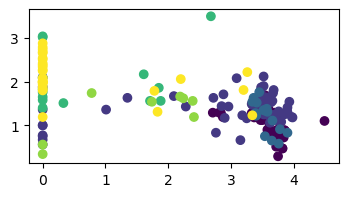

In [6]:
#Fit Model

clf=KNN(k=3)
clf.fit(X_train,Y_train)
predictions=clf.predict(X_test)
print(predictions)
plt.figure(figsize = (4,2))
plt.scatter(X[:,2],X[:,3],c=y)
plt.show()

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred=predictions,y_true=Y_test))

0.6307692307692307
